In [1]:
import gymnasium as gym
env = gym.make("CartPole-v1")
#reseting the enironment
state, info = env.reset()

In [2]:
state

array([-0.04774009, -0.01967113,  0.03883865,  0.02455472], dtype=float32)

In [3]:
num_of_episodes = 100
theta_rewards = []
omega_rewards = []

### Theta policy: if the pole is tilted to the left (θ<0), then push the cart to the left and vice versa. 

In [ ]:
import time
for i in range(num_of_episodes):
    observation,info = env.reset()#get all the state and info and all
    total_reward = 0
    done = False
    
    while not done:
        env.render()
        theta = observation[2] #get the current value of theta
        action = 0 if theta<0 else 1 #0->push to left 1-> push to right(action shd be 0 or 1)
        observation,reward,done,_,_ = env.step(action)
        total_reward +=reward
    
    theta_rewards.append(total_reward)
    print(f"Theta policy -> Episode {i+1}: Reward = {total_reward} \n")
    time.sleep(1)

Theta policy -> Episode 1: Reward = 10.0 

Theta policy -> Episode 2: Reward = 10.0 

Theta policy -> Episode 3: Reward = 9.0 

Theta policy -> Episode 4: Reward = 10.0 

Theta policy -> Episode 5: Reward = 10.0 

Theta policy -> Episode 6: Reward = 10.0 

Theta policy -> Episode 7: Reward = 9.0 

Theta policy -> Episode 8: Reward = 10.0 

Theta policy -> Episode 9: Reward = 9.0 

Theta policy -> Episode 10: Reward = 10.0 

Theta policy -> Episode 11: Reward = 10.0 

Theta policy -> Episode 12: Reward = 9.0 

Theta policy -> Episode 13: Reward = 9.0 

Theta policy -> Episode 14: Reward = 9.0 

Theta policy -> Episode 15: Reward = 8.0 

Theta policy -> Episode 16: Reward = 9.0 

Theta policy -> Episode 17: Reward = 10.0 

Theta policy -> Episode 18: Reward = 10.0 

Theta policy -> Episode 19: Reward = 10.0 

Theta policy -> Episode 20: Reward = 10.0 

Theta policy -> Episode 21: Reward = 9.0 

Theta policy -> Episode 22: Reward = 9.0 

Theta policy -> Episode 23: Reward = 11.0 

Theta p

###  Omega policy : when the pole is moving away from the vertical position (ω<0) then push the cart to the left and vice versa. 

In [ ]:
import time
for i in range(num_of_episodes):
    observation,info = env.reset()#get all the state and info and all
    total_reward = 0
    done = False
    
    while not done:
        env.render()
        omega = observation[3] #get the current value of theta
        action = 0 if omega<0 else 1 #0->push to left 1-> push to right(action shd be 0 or 1)
        observation,reward,done,_,_ = env.step(action)
        total_reward +=reward
    
    omega_rewards.append(total_reward)
    print(f"Theta policy -> Episode {i+1}: Reward = {total_reward} \n")
    time.sleep(1)

C:\Users\mca\AppData\Roaming\Python\Python39\site-packages\gymnasium\envs\classic_control\cartpole.py:215: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Theta policy -> Episode 1: Reward = 11.0 

Theta policy -> Episode 2: Reward = 11.0 

Theta policy -> Episode 3: Reward = 13.0 

Theta policy -> Episode 4: Reward = 12.0 

Theta policy -> Episode 5: Reward = 12.0 

Theta policy -> Episode 6: Reward = 14.0 

Theta policy -> Episode 7: Reward = 11.0 

Theta policy -> Episode 8: Reward = 12.0 

Theta policy -> Episode 9: Reward = 15.0 

Theta policy -> Episode 10: Reward = 12.0 

Theta policy -> Episode 11: Reward = 12.0 

Theta policy -> Episode 12: Reward = 15.0 

Theta policy -> Episode 13: Reward = 13.0 

Theta policy -> Episode 14: Reward = 12.0 

Theta policy -> Episode 15: Reward = 11.0 

Theta policy -> Episode 16: Reward = 13.0 

Theta policy -> Episode 17: Reward = 13.0 

Theta policy -> Episode 18: Reward = 11.0 

Theta policy -> Episode 19: Reward = 14.0 

Theta policy -> Episode 20: Reward = 11.0 

Theta policy -> Episode 21: Reward = 13.0 

Theta policy -> Episode 22: Reward = 12.0 

Theta policy -> Episode 23: Reward = 14.0

### Plot the cumulative rewards (based on steps) for each policy , write down the average rewards with standard deviation.

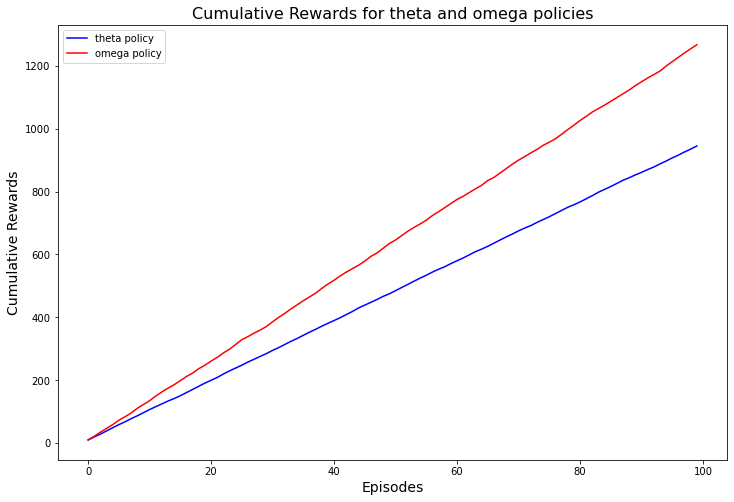

In [10]:
import matplotlib.pyplot as plt

#taking cumulative
cumulative_reward_theta = [sum(theta_rewards[:i+1]) for i in range(len(theta_rewards))]
cumulative_reward_omega = [sum(omega_rewards[:i+1]) for i in range(len(omega_rewards))]

plt.figure(figsize=(12, 8))
# Plotting both policies with proper labels for the legend
plt.plot(cumulative_reward_theta, color='b', label="theta policy")
plt.plot(cumulative_reward_omega, color='r', label='omega policy')

# Title and axis labels
plt.title("Cumulative Rewards for theta and omega policies", fontsize=16)
plt.xlabel("Episodes", fontsize=14)
plt.ylabel("Cumulative Rewards", fontsize=14)

# Adding the legend
plt.legend()

# Display the plot
plt.show()


In [11]:
import numpy as np
avg = np.average(cumulative_reward_theta)
std = np.std(cumulative_reward_theta)
print(f"theta policy -> average:{avg} and standard deviation:{std}")

theta policy -> average:479.68 and standard deviation:272.82044938017384


In [12]:
import numpy as np
avg = np.average(cumulative_reward_omega)
std = np.std(cumulative_reward_omega)
print(f"omega policy -> average:{avg} and standard deviation:{std}")

omega policy -> average:637.17 and standard deviation:366.2422983490574


 ### Comment on performance of policies.

We see that the score obtained with omega policy is way higher than that with the theta policy. The averages are also higher however, the standard deviation of omega is higher than that of theta.

As to why this is seen, the theta policy focuses on angle and tries to correct this by moving to the opposite side of a particular rotation. This causes lot more instability in the agent as compared to using the omega policy which takes into account the angular velocity.